<a href="https://colab.research.google.com/github/amantiwari1/Notebook_List/blob/master/Web_Scrabing_in_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import requests
from scrapy import Selector

data = requests.get("https://www.worldometers.info/coronavirus/").content
sel = Selector(text = data)
num_of_case = sel.css("#main_table_countries_today > tbody:nth-child(2) > tr > td:nth-child(2)::text").extract()
name_of_con = sel.css("#main_table_countries_today > tbody:nth-child(2) > tr >  td:nth-child(1) ::text").extract()
total_active = sel.css("#main_table_countries_today > tbody:nth-child(2) > tr >  td:nth-child(7) ::text").extract()
start_date = sel.css("#main_table_countries_today > tbody:nth-child(2) > tr >  td:nth-child(11) ::text").extract()


In [0]:
data_dict = {"Country":name_of_con,
             "Confirmed_Case":num_of_case,
             "total_active":total_active,
             "start_date":start_date}

In [32]:
import pandas as pd

df = pd.DataFrame(data_dict)
df.head()

,Country,Confirmed_Case,total_active,start_date
0,USA,"142,735","135,684",\nJan 20
1,Italy,"97,689","73,880",\nJan 29
2,Spain,"80,110","58,598",\nJan 30
3,Germany,"62,435","52,683",\nJan 26
4,France,"40,174","30,366",\nJan 23


In [33]:
df["Confirmed_Case"] = df["Confirmed_Case"].str.replace(",","").astype("int64")
df["total_active"] = df["total_active"].str.replace(",","").astype("int64")
df["start_date"] = df["start_date"].str.replace("\n","")
df["Closed_Case"] = df["Confirmed_Case"] - df["total_active"]
df.head()

,Country,Confirmed_Case,total_active,start_date,Closed_Case
0,USA,142735,135684,Jan 20,7051
1,Italy,97689,73880,Jan 29,23809
2,Spain,80110,58598,Jan 30,21512
3,Germany,62435,52683,Jan 26,9752
4,France,40174,30366,Jan 23,9808


In [35]:
df = df.sort_values(by="Confirmed_Case", ascending=False)
df.head()

,Country,Confirmed_Case,total_active,start_date,Closed_Case
0,USA,142735,135684,Jan 20,7051
1,Italy,97689,73880,Jan 29,23809
200,China,81470,2466,Jan 10,79004
2,Spain,80110,58598,Jan 30,21512
3,Germany,62435,52683,Jan 26,9752


In [36]:
df = df.reset_index().drop("index",axis=1)
df.head()

,Country,Confirmed_Case,total_active,start_date,Closed_Case
0,USA,142735,135684,Jan 20,7051
1,Italy,97689,73880,Jan 29,23809
2,China,81470,2466,Jan 10,79004
3,Spain,80110,58598,Jan 30,21512
4,Germany,62435,52683,Jan 26,9752


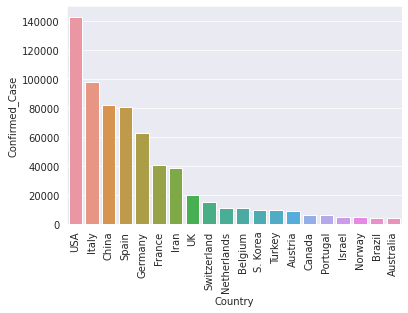

In [37]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style(style = "darkgrid")

g = sns.barplot(x="Country", y="Confirmed_Case", data = df[:20])
g.set_xticklabels(labels=g.get_xticklabels(), rotation=90)
plt.show()


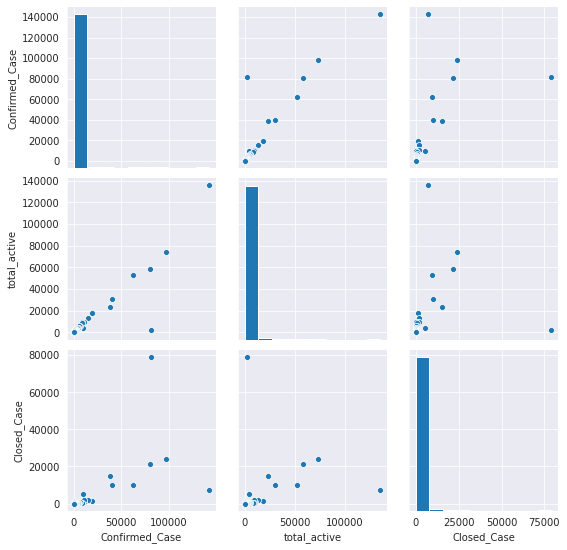

In [38]:
sns.pairplot(df)